# Correlation matrices in R

Correlation matrices are great ways to visualize relationships between multiple different continuous variables. Both generating the intial correlation matrix and turning that matrix into a pretty plot are pretty straightforward in base R. 

There are some other methods of generating these plots using specialized R packages (*corrplot* and *GGally*), but unforutnately working in the JupyterLite environment means that these packages might not be readily available to us. Not to worry, there's still plenty that we can accomplish simply in the base R environment!

In [5]:
IRdisplay::display_pdf(file = "../plots/prettyCorr.pdf")

## Correlation matrices in base R

The data we are working with in this notebook is the *msleep* dataset included as part of the *ggplot2* package. This dataset includes data for a variety of sleep traits across a series of different mammal species. Let's take a look at how our data is structured! 

In [2]:
#load the ggplot2 package (so we can access our data)
library(ggplot2)

#view data
head(msleep)

  name                       genus      vore  order        conservation
1 Cheetah                    Acinonyx   carni Carnivora    lc          
2 Owl monkey                 Aotus      omni  Primates     NA          
3 Mountain beaver            Aplodontia herbi Rodentia     nt          
4 Greater short-tailed shrew Blarina    omni  Soricomorpha lc          
5 Cow                        Bos        herbi Artiodactyla domesticated
6 Three-toed sloth           Bradypus   herbi Pilosa       NA          
  sleep_total sleep_rem sleep_cycle awake brainwt bodywt 
1 12.1         NA              NA   11.9       NA  50.000
2 17.0        1.8              NA    7.0  0.01550   0.480
3 14.4        2.4              NA    9.6       NA   1.350
4 14.9        2.3       0.1333333    9.1  0.00029   0.019
5  4.0        0.7       0.6666667   20.0  0.42300 600.000
6 14.4        2.2       0.7666667    9.6       NA   3.850

We can see by viewing the first few lines of the dataframe that our continuous variables of interest are stored in columns 6 through 11 of the data frame. Let's go ahead and extract these, storing them in a new object!

In [3]:
#extract continuous variables for correlation matrix
datMS <- msleep[,c(6:11)]

From here, we can move to actually building our correlation matrix using the function *cor*. If supplied a 2 dimensional object, this function will build a correlation matrix describing relationships between the different columns of data. There are several different methods for calculating correlation coefficients which can be used, but we'll be working with Pearson's correlation coefficients today (which is also the default if the *method* argument of the function is not defined. 

In order to deal with missing data, there are two possible methods we can specify by way of the *use* keyword argument. The first of these, *complete.obs*, removes any rows from the columns which are missing data in any of the columns. This is useful for ensuring that all coefficients are calculated using the same set of samples, but can result in a large reduction in the sample size used for calculation.

The second method, *pairwise.complete.obs*, removes rows from the calculation of specific coefficients if they are missing data in the columns which are the current focal columns for correlation coefficient calculation. This let's us retain more data that can be incorporated into our calculations, but also means that the samples used to calculate coefficients may differ across different comparisons.

In today's case, we'll be using the *pairwise.complete.obs* method due to the already small sample size of our dataset.

In [4]:
#build correlation matrix
datMSCorrMat <- cor(datMS, #2 dimensional data structure with continuous variables (in this case a dataframe)
                    use="pairwise.complete.obs", #method for deciding data to include in calculations
                   method="pearson") #method for calculating coefficient
datMSCorrMat

            sleep_total sleep_rem  sleep_cycle awake      brainwt    bodywt    
sleep_total  1.0000000   0.7517550 -0.4737127  -0.9999986 -0.3604874 -0.3120106
sleep_rem    0.7517550   1.0000000 -0.3381235  -0.7517713 -0.2213348 -0.3276507
sleep_cycle -0.4737127  -0.3381235  1.0000000   0.4737127  0.8516203  0.4178029
awake       -0.9999986  -0.7517713  0.4737127   1.0000000  0.3604874  0.3119801
brainwt     -0.3604874  -0.2213348  0.8516203   0.3604874  1.0000000  0.9337822
bodywt      -0.3120106  -0.3276507  0.4178029   0.3119801  0.9337822  1.0000000

When plotting a matrix like we're trying to do, R fills in cells from the bottom left to the top right cell of the plotted matrix, but starts from the top left of the input matrix and moves to the bottom right.

Additionally, it also prioritises vertical over horizontal filling of cells, i.e. it will fill all rows in the column before moving to the next column in the plotted matrix.

To account for this, we're going to first reverse the order of each column, and then transpose the matrix.

In [7]:
#reverse and transpose correlation matrix
datMSCorrFlipped <- t(apply(datMSCorrMat,2,rev))
datMSCorrFlipped

            bodywt     brainwt    awake      sleep_cycle sleep_rem  sleep_total
sleep_total -0.3120106 -0.3604874 -0.9999986 -0.4737127   0.7517550  1.0000000 
sleep_rem   -0.3276507 -0.2213348 -0.7517713 -0.3381235   1.0000000  0.7517550 
sleep_cycle  0.4178029  0.8516203  0.4737127  1.0000000  -0.3381235 -0.4737127 
awake        0.3119801  0.3604874  1.0000000  0.4737127  -0.7517713 -0.9999986 
brainwt      0.9337822  1.0000000  0.3604874  0.8516203  -0.2213348 -0.3604874 
bodywt       1.0000000  0.9337822  0.3119801  0.4178029  -0.3276507 -0.3120106 

Let's also go ahead and define some more informative names for our variables!

In [8]:
#define informative variable names
varNames <- c("Sleep total", 
             "Sleep REM",
             "Sleep cycle",
             "Awake",
             "Brain weight",
             "Body weight")

And with that, we're now ready to plot our correlation matrix! We'll be accomplishing this with the help of the *image* function, which is slightly more flexible than the *plot* funciton which we might have encountered before.

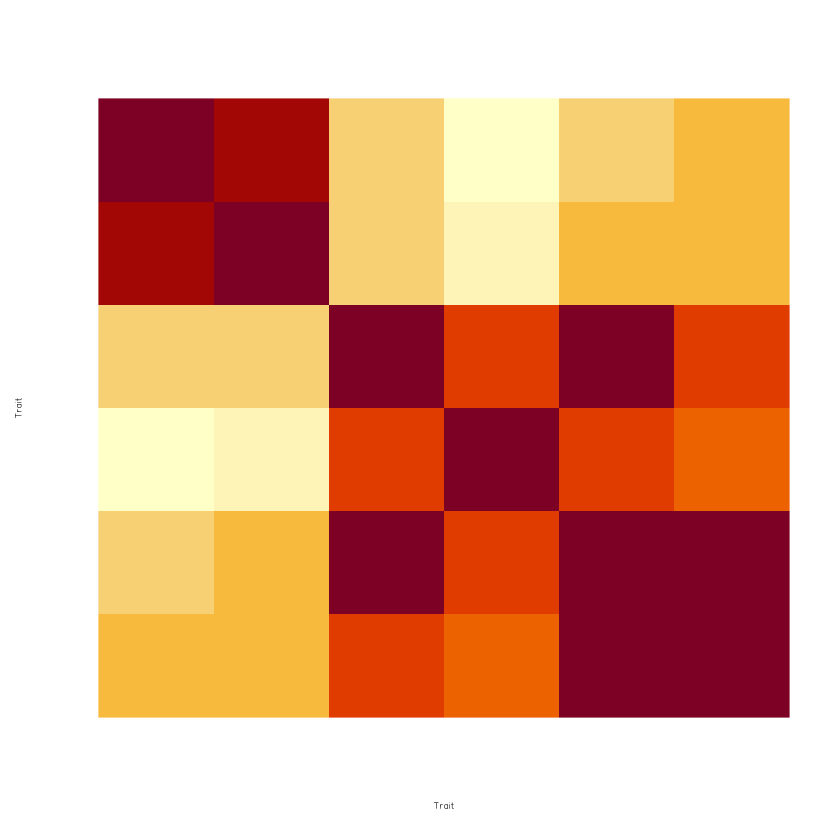

In [9]:
#plot matrix
image(1:ncol(datMSCorrFlipped), #number of columns in  matrix
      1:nrow(datMSCorrFlipped), #number of rows in matrix
      xlab = "Trait", ylab = "Trait", #X and y axis titles
      datMSCorrFlipped, #input data in the form of a matrix (dimensions should be the same as those specified above
      axes = FALSE) #don't include any interior axis labels

We can add a nice custom color palette, as well as axes labels.

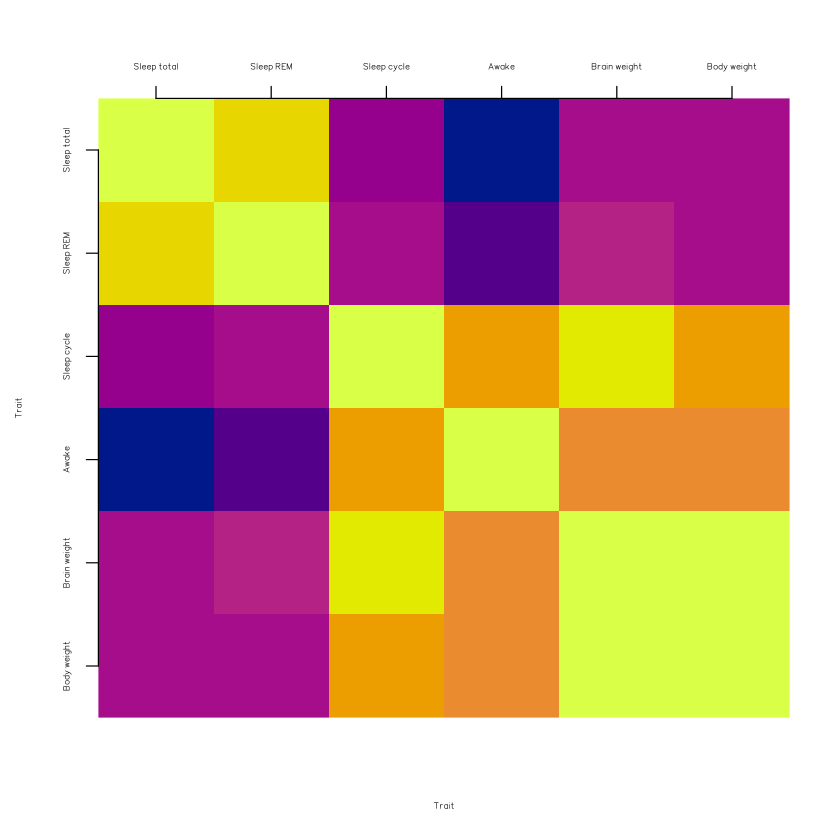

In [10]:
#plot matrix
image(1:ncol(datMSCorrFlipped), #number of columns in  matrix
      1:nrow(datMSCorrFlipped), #number of rows in matrix
      xlab = "Trait", ylab = "Trait", #X and y axis titles
      datMSCorrFlipped, #input data in the form of a matrix (dimensions should be the same as those specified above
      col = hcl.colors(20,"plasma"), #color palette
      axes = FALSE) #don't include any interior axis labels
axis(3, 1:ncol(datMSCorrFlipped), varNames,cex.axis = 0.8) # x axis labels, we specify here that we want them above the graph (first positional argument)
axis(2, 1:nrow(datMSCorrFlipped), rev(varNames),cex.axis = 0.8) # y axis labels

One issue that we have is that we don't really know what colors correspond with high/low/positive/negative correlation coefficients. One easy way to rectify this is by simply adding the values themselves to the plot! We're gonna do this by looping through our columns and rows of the plotted matrix, adding new text (our coefficients) to each cell.

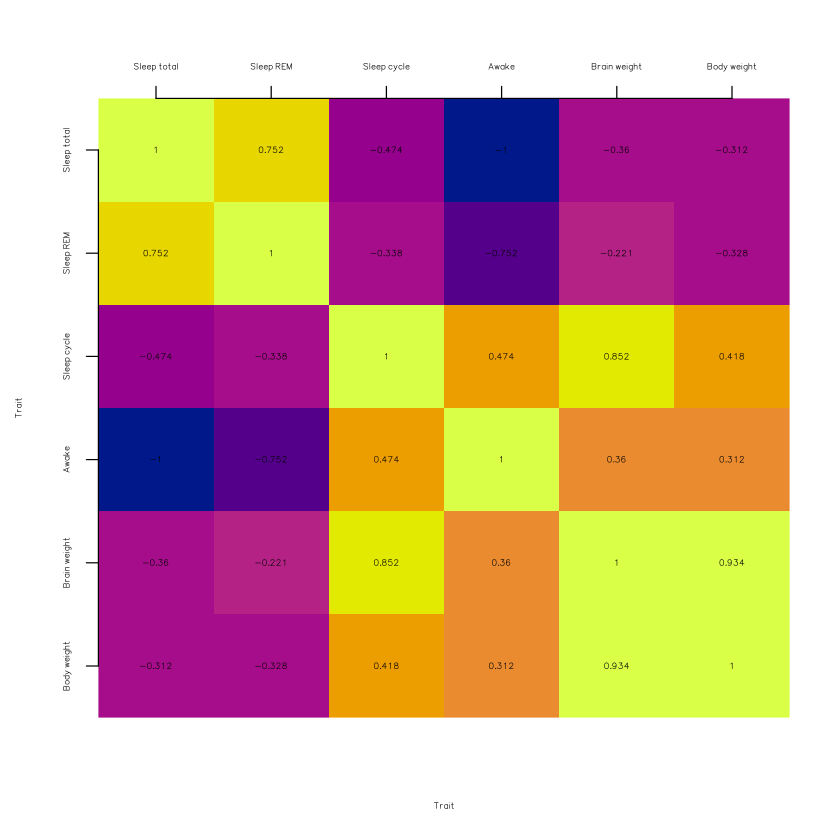

In [13]:
#plot matrix
image(1:ncol(datMSCorrFlipped), #number of columns in  matrix
      1:nrow(datMSCorrFlipped), #number of rows in matrix
      xlab = "Trait", ylab = "Trait", #X and y axis titles
      datMSCorrFlipped, #input data in the form of a matrix (dimensions should be the same as those specified above
      col = hcl.colors(20,"plasma"), #color palette
      axes = FALSE) #don't include any interior axis labels
axis(3, 1:ncol(datMSCorrFlipped), varNames,cex.axis = 0.8) # x axis labels, we specify here that we want them above the graph (first positional argument)
axis(2, 1:nrow(datMSCorrFlipped), rev(varNames),cex.axis = 0.8) # y axis labels

#looping through columns
for (x in 1:ncol(datMSCorrFlipped)){ 
    for (y in 1:nrow(datMSCorrFlipped)){ #loop through rows
        # add text values into matrix based on transposed/rotated indices + round values to three digits
        text(x, y, round(datMSCorrFlipped[x,y],3))
    }
}


It's also probably a good idea for us to add a proper legend as well. One way that we might do this is to split our plot into essentially 2 different frames oriented horizontally, with the matrix we have so far occupying the left and larger frame. We can then build our legend as a "plot" ocucpying the smaller right frame.

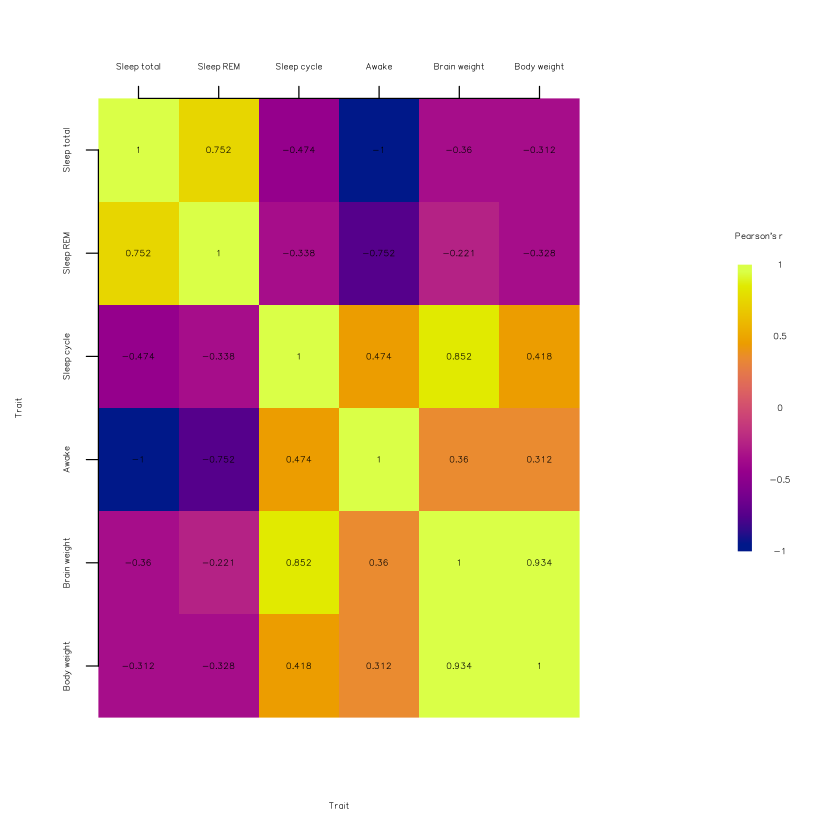

In [14]:
#specify layout for overall plot
layout(matrix(1:2,ncol=2), #matrix with two columns and one row, we can think of each matrix cell as a frame or window!
       width = c(3,1), #relative width of windows: here we're specifcying that we want the left window to be three times wider than the right
       height = c(1,1)) #relative height of windows, equal in this case!
#plot matrix
image(1:ncol(datMSCorrFlipped), #number of columns in  matrix
      1:nrow(datMSCorrFlipped), #number of rows in matrix
      xlab = "Trait", ylab = "Trait", #X and y axis titles
      datMSCorrFlipped, #input data in the form of a matrix (dimensions should be the same as those specified above
      col = hcl.colors(20,"plasma"), #color palette
      axes = FALSE) #don't include any axis labels
axis(3, 1:ncol(datMSCorrFlipped), varNames,cex.axis = 0.8) # x axis labels, we specify here that we want them above the graph (first positional argument)
axis(2, 1:nrow(datMSCorrFlipped), rev(varNames),cex.axis = 0.8) # y axis labels

#looping through columns
for (x in 1:ncol(datMSCorrFlipped)){ 
    for (y in 1:nrow(datMSCorrFlipped)){ #loop through rows
        # add text values into matrix based on transposed/rotated indices + round values to three digits
        text(x, y, round(datMSCorrFlipped[x,y],3))
    }
}

legend_image <- as.raster(matrix(rev(hcl.colors(20,"plasma")), ncol=1)) #define image. In this case, we're simply defining a single column matrix representing a color gradient
plot(c(0,2),c(0,1),type = 'n', axes = F,xlab = '', ylab = '') #define plot, this is currently empty before we add the lines below
text(x=1.75, y = seq(0.25,0.75,l=5), labels =  seq(-1,1,l=5),cex=0.75) #add text for labelling increments along the color gradient. Labels will be 5 equally spaced values spanning from -1 to 1.
text(x=1, y = 0.8, labels = "Pearson's r",cex=1) #add title for legend
rasterImage(legend_image, 0.25, 0.25, 0.75,0.75) #add image to plot


We now have a nice correlation matrix which effectively communicates all the relationships one might be interested in! We can now go ahead and save this image as a PDF file by wrapping the code to generate the plot with the *pdf()* and *dev.off()* functions.

In [15]:
pdf("../plots/prettyCorr.pdf",width=9,height=9)
layout(matrix(1:2,ncol=2), width = c(3,1),height = c(1,1))
image(1:ncol(datMSCorrFlipped), 1:nrow(datMSCorrFlipped), xlab = "Trait", ylab = "Trait", datMSCorrFlipped, 
      col = hcl.colors(20,"plasma"), axes = FALSE)
axis(3, 1:ncol(datMSCorrFlipped), varNames,cex.axis = 0.8)
axis(2, 1:nrow(datMSCorrFlipped), rev(varNames),cex.axis = 0.8)
for (x in 1:ncol(datMSCorrFlipped)){
    for (y in 1:nrow(datMSCorrFlipped)){
        # add text values into matrix based on transposed/rotated indices + round values to two digits
        text(x, y, round(datMSCorrFlipped[x,y],3))
    }
}

legend_image <- as.raster(matrix(rev(hcl.colors(20,"plasma")), ncol=1))
plot(c(0,2),c(0,1),type = 'n', axes = F,xlab = '', ylab = '')
text(x=1.75, y = seq(0.25,0.75,l=5), labels =  seq(-1,1,l=5),cex=0.75)
text(x=1, y = 0.8, labels = "Pearson's r",cex=1)
rasterImage(legend_image, 0.25, 0.25, 0.75,0.75)
dev.off()

pdf 
  2 

In [16]:
IRdisplay::display_pdf(file = "../plots/prettyCorr.pdf")